# BitsxLaMarato | linies de la vida amb IA

In [6]:
import cv2
import fitz
from PIL import Image

## Image preprocessing

In [5]:
def extract_pages_as_images(pdf_path, output_folder):
    pdf_document = fitz.open(pdf_path)

    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        image_list = page.get_pixmap(alpha=False)

        img_filename = f"{output_folder}/page{page_num + 1}.png"
        image_list.save(img_filename)

    pdf_document.close()

# List of PDF file names
pdf_files = ["RCTG_1.pdf", "RCTG_2.pdf", "RCTG_3.pdf", "RCTG_6.pdf", "RCTG_7_.pdf", "RCTG_8.pdf"]

# Folder to save extracted images
output_folder_path = "extracted_images"

# Iterate through each PDF file and extract images
for pdf_file in pdf_files:
    pdf_path = f"pdf_files/{pdf_file}"
    extract_pages_as_images(pdf_path, output_folder_path)

**Detecting corners with Harris**

- Applying Harris Corner Detection to detect corners and potentially create new patterns for the FCF

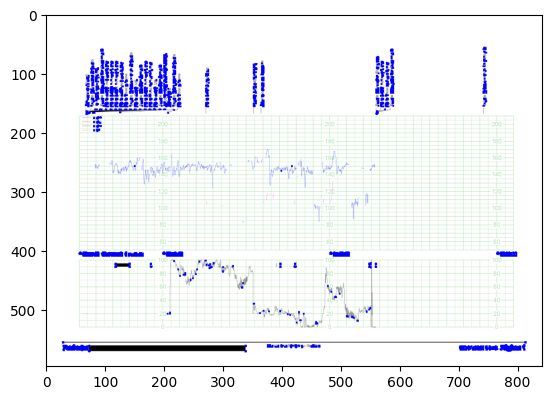

In [32]:
import matplotlib.pyplot as plt

page_1 = cv2.imread("extracted_images/page1.png")

# Convert to grayscale
page_1_gray = cv2.cvtColor(page_1, cv2.COLOR_BGR2GRAY)

# Detect corners using Harris Corner Detector
page_1_corners = cv2.cornerHarris(page_1_gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
page_1_corners = cv2.dilate(page_1_corners, None)

# Threshold the corner image to filter out weak corners
page_1[page_1_corners > 0.01 * page_1_corners.max()] = [0, 0, 255]

# Display the image with corners detected
plt.imshow(page_1)

## Apply pattern matching given some templates

Load up all templates

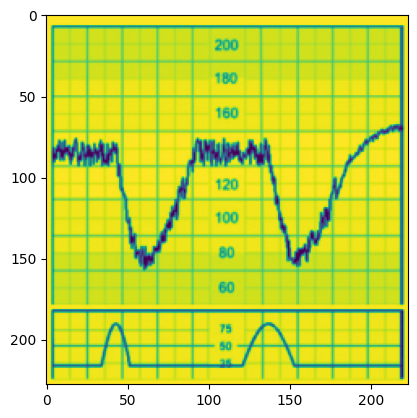

In [42]:
# Load the templates in grayscale
template_1 = cv2.imread("templates/template_1_deceleration.png", 0)

template_2 = cv2.imread("templates/template_2_deceleration.png", 0)

template_3 = cv2.imread("templates/template_3_bradycardia.png", 0)

template_4 = cv2.imread("templates/template_4_reduced_variability.png", 0)

template_5 = cv2.imread("templates/template_5_skipper.png", 0)

template_6 = cv2.imread("templates/template_6_sinus.png", 0)

template_7 = cv2.imread("templates/template_7_pseudosinus.png", 0)

template_8 = cv2.imread("templates/template_8_acceleration.png", 0)

template_9 = cv2.imread("templates/template_9_early_decelerations.png", 0)

template_10 = cv2.imread("templates/template_10_variable_decelerations.png", 0)

template_11 = cv2.imread("templates/template_11_bradycardia_decelerations.png", 0)

template_12 = cv2.imread("templates/template_12_increaseFCFb.png", 0)

template_13 = cv2.imread("templates/template_13_reduced_variability.png", 0)

template_14 = cv2.imread("templates/template_14_terminal_cardiac_arrest.png", 0)

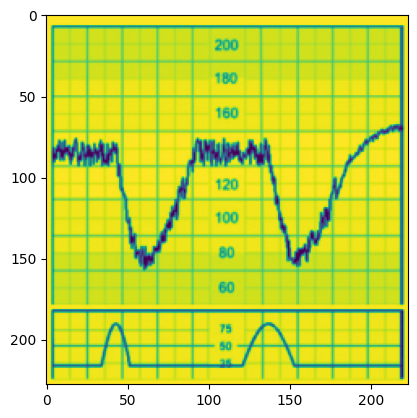

In [41]:

# Store the templates in a list
templates = [template_1, template_2, template_3, template_4, template_5, template_6, template_7, template_8, template_9, template_10, template_11, template_12, template_13, template_14]

# Iterate through each template and perform template matching
for template in templates:
    # Perform template matching
    result = cv2.matchTemplate(page_1_gray, template, cv2.TM_CCOEFF_NORMED)

    # Store the coordinates of matched area in a numpy array
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Draw a rectangle around the matched region
    top_left = max_loc
    bottom_right = (top_left[0] + 50, top_left[1] + 50)
    cv2.rectangle(page_1, top_left, bottom_right, (0, 0, 255), 2)

# Display the image with the matched template
plt.imshow(page_1)
plt.imshow(template_1)
